# Building an image model from results obtained by fitting:

## M51 test data

Initially we fit the M51 test image; then, from the fit results we build a model, and finnaly we subtract the model from the original image.

In [1]:
from astropy.io import fits
image = fits.open("../../test/data/M51.fits")
pixel_data = image[0].data

from ellipse.ellipse import Ellipse
ellipse = Ellipse(pixel_data)
isolist = ellipse.fit_image(sclip=2., nclip=3)

Centering on object....   Done. Found x0 = 257.0, y0 = 258.0
#
# Semi-      Isophote         Ellipticity    Position     Grad.   Data  Flag Iter. Stop
# major        mean                           Angle        rel.                    code
# axis       intensity                                    error
#(pixel)                                     (degree)
#
  10.00     1089.59 ( 8.44)  0.102 (0.006)  65.93 ( 2.0)  0.191    60     0   20     0
  11.00     1044.70 ( 7.70)  0.132 (0.005)  72.93 ( 1.1)  0.150    65     0   10     0
  12.10      983.21 ( 5.88)  0.157 (0.003)  70.03 ( 0.6)  0.122    61     9   10     0
  13.31      916.06 ( 7.32)  0.157 (0.006)  49.90 ( 1.3)  0.216    70     7   50     2
  14.64      895.94 ( 6.87)  0.223 (0.004)  55.85 ( 0.7)  0.160    77     4   19     0
  16.11      868.99 ( 5.41)  0.282 (0.003)  51.85 ( 0.5)  0.152    76    10   12     0
  17.72      851.25 ( 5.75)  0.282 (0.003)  43.00 ( 0.3)  0.119    79    15   12     0
  19.49      731.82 ( 4.44)  0.1

Now we build a model image. 

Note that we use a background estimate taken from the data array itself. This is arbitrary though, just for demo purposes in here.

In [2]:
import numpy as np
from ellipse.model import build_model

model_image = build_model(pixel_data, isolist, fill=np.mean(pixel_data[0:10,0:10]))

Interpolating....Done
SMA=119.1
Done


In [3]:
print(pixel_data.shape)
print(model_image.shape)

(512, 512)
(512, 512)


Display (just the central, modeled region):

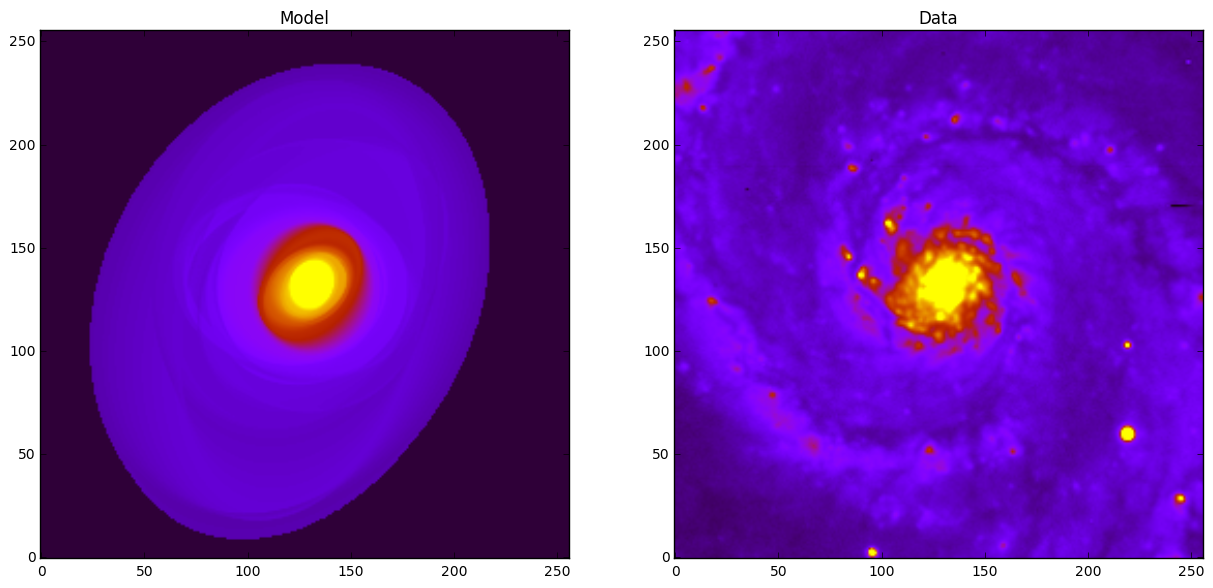

In [4]:
model = model_image[128:384,128:384]
data = pixel_data[128:384,128:384]

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['image.origin'] = 'lower'

plt.rcParams['figure.figsize'] = (15.0, 10.0)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(model, cmap=cm.gnuplot, vmin=0, vmax=1000)
ax1.set_title("Model")
ax2.imshow(data, cmap=cm.gnuplot, vmin=0, vmax=1000)
ax2.set_title("Data")


Finally, subtract model from data:


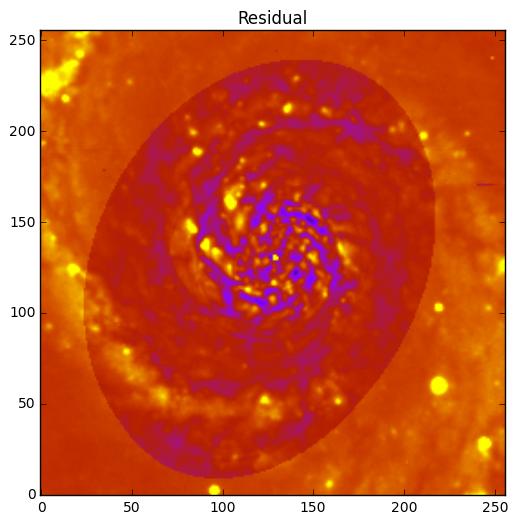

In [5]:
residual = data - model

plt.rcParams['figure.figsize'] = (6.0, 6.0)
fig, ax = plt.subplots()

ax.imshow(residual, cmap=cm.gnuplot, vmin=-300, vmax=300)
ax.set_title("Residual")

## Elliptical galaxy

Of course, M51 is not the best object to test this procedure, since the non-elliptical contamination is so significant.

Better results can be obtained from a "true" elliptical galaxy. We chose a public-domain image of Messier 60 as published at asd.gsfc.nasa.gov

In [27]:
image = fits.open("../../test/data/M105-S001-RGB.fits")
pixel_data = image[0].data[0]

from ellipse.geometry import Geometry
g = Geometry(530., 511, 10., 0.2, 20./180.*3.14)

ellipse = Ellipse(pixel_data, geometry=g)
isolist = ellipse.fit_image()

model_image = build_model(pixel_data, isolist, fill=np.mean(pixel_data[20:120,20:120]))
model = model_image
data = pixel_data
residual = data - model

Centering on object....   Done. Found x0 = 530.0, y0 = 512.0
#
# Semi-      Isophote         Ellipticity    Position     Grad.   Data  Flag Iter. Stop
# major        mean                           Angle        rel.                    code
# axis       intensity                                    error
#(pixel)                                     (degree)
#
  10.00     1512.34 ( 0.06)  0.066 (0.000)  12.19 ( 0.2)  0.013    61     0   20     0
  11.00     1505.58 ( 0.06)  0.074 (0.000)  13.00 ( 0.2)  0.015    67     0   10     0
  12.10     1499.54 ( 0.07)  0.077 (0.001)  12.89 ( 0.2)  0.016    74     0   10     0
  13.31     1494.16 ( 0.05)  0.082 (0.000)  12.69 ( 0.2)  0.016    81     0   10     0
  14.64     1489.53 ( 0.05)  0.083 (0.001)  12.11 ( 0.2)  0.019    89     0   10     0
  16.11     1485.90 ( 0.05)  0.088 (0.001)  10.68 ( 0.2)  0.023    97     0   10     0
  17.72     1483.12 ( 0.05)  0.097 (0.001)  11.79 ( 0.2)  0.027   106     0   10     0
  19.49     1480.81 ( 0.04)  0.1

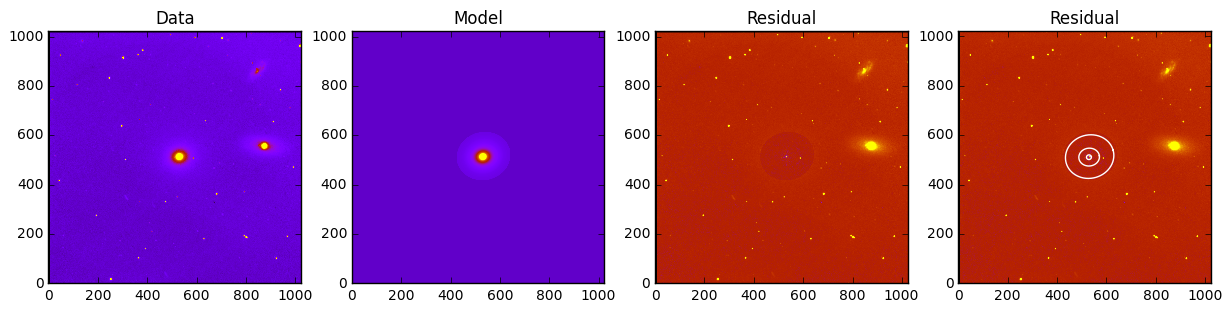

In [28]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
plt.axis([0,1023,0,1023])
ax1.imshow(data, cmap=cm.gnuplot, vmin=1460., vmax=1490.)
ax1.set_title("Data")
ax2.imshow(model, cmap=cm.gnuplot, vmin=1460., vmax=1490.)
ax2.set_title("Model")
ax3.imshow(residual, cmap=cm.gnuplot, vmin=-10, vmax=10)
ax3.set_title("Residual")
ax4.imshow(residual, cmap=cm.gnuplot, vmin=-10, vmax=10)
ax4.set_title("Residual")

iso1 = isolist.get_closest(10.)
iso2 = isolist.get_closest(40.)
iso3 = isolist.get_closest(100.)

x, y, = iso1.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso2.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso3.sampled_coordinates()
plt.plot(x, y, color='white')



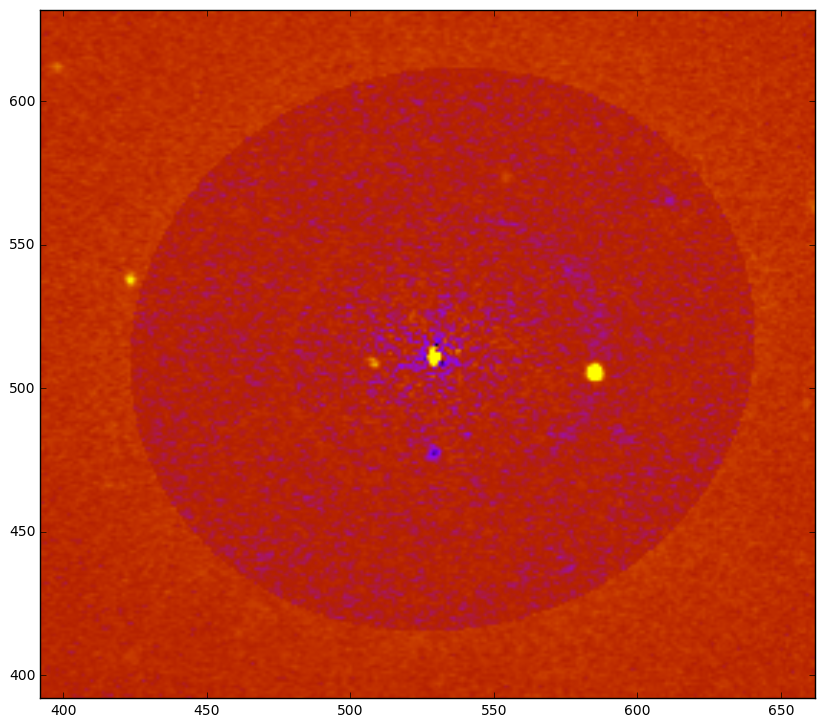

In [29]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
fig, ax = plt.subplots()
plt.axis([512-120,512+150,512-120,512+120])
ax.imshow(residual, cmap=cm.gnuplot, vmin=-5, vmax=5)

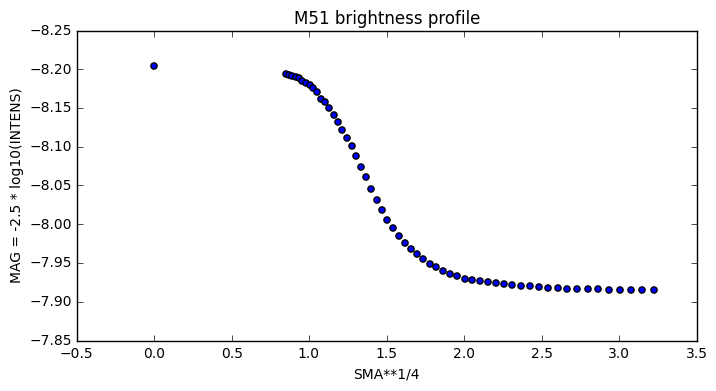

In [30]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)

plt.scatter(isolist.sma**0.25, -2.5*np.log10(isolist.intens))

plt.xlabel('SMA**1/4')
plt.ylabel('MAG = -2.5 * log10(INTENS)')
plt.gca().invert_yaxis()
plt.title("M51 brightness profile")